# DATA SCIENTIST JOB RECOMMENDER SYSTEM
- Names: 
    - Ingavi Kilavuka
    - Calvin Omwega
    - Alvin Kimathi
    - Ronny Kabiru
- Instructor: Maryann Mwikali
- Modeling Focus: Hybrid NLP & Recommender system 

## Table of contents 
1. [Business Understanding](#1-business-understanding)
    1. [Objectives](#objectives)
    1. [Problem Definition](#Problem-definition)
3. [Imports](#imports)
2. [Data Cleaning](#Data-Cleaning)
    1. [Data engineering](#data-engineeringnlp)

## 1. Business Understanding

## Objective

In the pursuit for jobs in our desired field, This project aims to:
1. *Develop a Personalized Recommendation Algorithm*:
   - Create a machine learning-based recommender system that analyzes a data scientist's profile (e.g., skills, experience, career goals) and matches them with the most relevant job opportunities.

2. *Enhance Job Matching Precision*:
   - Improve the accuracy of job recommendations by incorporating advanced NLP techniques to analyze job descriptions and user profiles, ensuring that recommendations are based on a deep understanding of both the candidate's qualifications and the job requirements.

3. *Improve User Experience*:
   - Design an intuitive user interface that allows data scientists to easily input their preferences, receive job recommendations, and provide feedback to further refine the recommendation algorithm.

4. *Integrate Continuous Learning*:
   - Implement a feedback loop where the recommender system continuously learns from user interactions (e.g., job applications, rejections, and preferences) to improve the relevance of future recommendations.

5. *Address Diversity and Inclusion*:
   - Ensure the recommender system promotes diversity by identifying and mitigating biases in job recommendations, allowing for fair and equitable matching of candidates from various backgrounds.

6. *Performance Evaluation*:
   - Develop metrics to evaluate the success of the recommender system, such as user satisfaction, recommendation accuracy, and the rate of successful job placements.

## Problem definition 
In today's rapidly evolving job market, data scientists face a plethora of job opportunities across various industries and roles. However, the diversity in job descriptions, required skills, and company expectations can make it challenging for data scientists to identify roles that align with their specific skills, experience, and career aspirations. Traditional job search platforms often provide overwhelming results, making it difficult for data scientists to filter through the noise and find the most suitable opportunities. This lack of tailored recommendations can lead to inefficient job searches, missed opportunities, and potentially unsatisfactory job placements. 

### Imports

In [163]:
#Data cleaning
import pandas as pd
import numpy as np


#Tokenization
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

#EDA
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
! pip install surprise
from surprise import SVD, KNNBasic, KNNWithMeans, Reader, Dataset,KNNBaseline
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from surprise import NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/calvinomwega/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/calvinomwega/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [164]:
# df = pd.read_csv('data.csv', on_bad_lines='skip', sep=",", encoding='cp1252')
df = pd.read_csv('jd_structured_data.csv')

In [165]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Competitors', 'Average Salary', 'Average Revenue', 'Processed_JD'],
      dtype='object')

In [166]:
df.Location.unique()

array(['Albuquerque, NM', 'Linthicum, MD', 'Clearwater, FL',
       'Richland, WA', 'New York, NY', 'Dallas, TX', 'Baltimore, MD',
       'San Jose, CA', 'Rochester, NY', 'Chantilly, VA', 'Plano, TX',
       'Seattle, WA', 'Cambridge, MA', 'Newark, NJ', 'Mountain View, CA',
       'San Francisco, CA', 'Denver, CO', 'Chicago, IL', 'Louisville, KY',
       'Oregon', 'Herndon, VA', 'Hillsboro, OR', 'Worcester, MA',
       'Groton, CT', 'Detroit, MI', 'Sunnyvale, CA', 'Ipswich, MA',
       'Redlands, CA', 'Woburn, MA', 'Fremont, CA', 'Long Beach, NY',
       'Marlborough, MA', 'Allendale, NJ', 'Chandler, AZ',
       'Washington, DC', 'Bellevue, WA', 'Longmont, CO',
       'Beavercreek, OH', 'Peoria, IL', 'Kingdom, IL',
       'Fort Lauderdale, FL', 'Boston, MA', 'Huntsville, AL',
       'Armonk, NY', 'San Diego, CA', 'Saint Louis, MO', 'Lincoln, RI',
       'Cincinnati, OH', 'Palo Alto, CA', 'Coraopolis, PA',
       'Framingham, MA', 'Atlanta, GA', 'New Jersey', 'Philadelphia, PA',
       

In [167]:
df.shape

(956, 14)

In [168]:
df.describe()

,Rating,Size,Founded,Average Salary,Average Revenue
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,3.601255,3027.393199,1774.605649,103.153900,24319.000761
std,1.067619,3677.688565,598.942517,31.971932,60571.308570
min,-1.000000,-1.000000,-1.000000,15.500000,1.000000
25%,3.300000,350.500000,1937.000000,84.500000,17.500000
50%,3.800000,750.500000,1992.000000,103.153900,1500.000000
75%,4.200000,3027.393199,2008.000000,114.000000,24319.000761
max,5.000000,10000.000000,2019.000000,254.000000,250500.000000


In [169]:
df.dtypes

Job Title             object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                 float64
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Competitors           object
Average Salary       float64
Average Revenue      float64
Processed_JD          object
dtype: object

In [170]:
df

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Competitors,Average Salary,Average Revenue,Processed_JD
0,Data Scientist,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,-1,72.0000,75.000000,"Data Scientist Location: Albuquerque, Educatio..."
1,Healthcare Data Scientist,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,-1,87.5000,3500.000000,What You Will Do: General Summary The Healthca...
2,Data Scientist,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",750.5,2010,Company - Private,Security Services,Business Services,-1,85.0000,300.000000,"KnowBe4, Inc. high growth information security..."
3,Data Scientist,3.8,PNNL,"Richland, WA","Richland, WA",3000.5,1965,Government,Energy,"Oil, Gas, Energy & Utilities","Oak Ridge National Laboratory, National Renewa...",76.5000,250500.000000,*Organization Job ID** Job ID: 310709 Director...
4,Data Scientist,2.9,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Advertising & Marketing,Business Services,"Commerce Signals, Cardlytics, Yodlee",114.5000,24319.000761,Data Scientist Affinity Solutions Marketing Cl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,Senior Data Engineer,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",3000.5,2006,Company - Public,Internet,Information Technology,"See Tickets, TicketWeb, Vendini",102.5000,300.000000,THE CHALLENGE Eventbrite world-class data repo...
952,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",750.5,1984,College / University,Colleges & Universities,Education,-1,73.5000,24319.000761,The Auton Lab Carnegie Mellon University large...
953,Data Science Manager,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",25.5,-1,Company - Private,Staffing & Outsourcing,Business Services,-1,127.5000,7.500000,Data Science ManagerResponsibilities: Oversee ...
954,Data Engineer,4.8,IGNW,"Austin, TX","Portland, OR",350.5,2015,Company - Private,IT Services,Information Technology,Slalom,103.1539,37.500000,Loading... Title: Data Engineer Location: Aust...


In [171]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

Job Title            0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Competitors          0.0
Average Salary       0.0
Average Revenue      0.0
Processed_JD         0.0
dtype: float64


## Data Cleaning

In [172]:
# 1. Handle Missing Values
# Replace '-1' with NaN (common placeholder for missing data)
#df.replace('-1', pd.NA, inplace=True)

In [173]:
df = df.drop('Competitors', axis=1)


In [174]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

Job Title            0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Average Salary       0.0
Average Revenue      0.0
Processed_JD         0.0
dtype: float64


In [175]:
# 2. Data Type Corrections
# Convert 'Size', 'Average Salary', and 'Average Revenue' to numeric (if applicable)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Average Salary'] = pd.to_numeric(df['Average Salary'], errors='coerce')
df['Average Revenue'] = pd.to_numeric(df['Average Revenue'], errors='coerce')

In [176]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

Job Title            0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Average Salary       0.0
Average Revenue      0.0
Processed_JD         0.0
dtype: float64


In [177]:
# 3. Outlier Detection
# You might want to inspect specific columns for outliers manually or use statistical methods
# Example: Cap or remove outliers in 'Average Salary' or 'Average Revenue'
q1 = df['Average Salary'].quantile(0.25)
q3 = df['Average Salary'].quantile(0.75)
iqr = q3 - q1

In [178]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

Job Title            0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Average Salary       0.0
Average Revenue      0.0
Processed_JD         0.0
dtype: float64


In [179]:
# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
df = df[(df['Average Salary'] >= lower_bound) & (df['Average Salary'] <= upper_bound)]

# Repeat similar steps for 'Average Revenue' if necessary

In [180]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

Job Title            0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Average Salary       0.0
Average Revenue      0.0
Processed_JD         0.0
dtype: float64


In [181]:
# 4. Text Data Cleaning
# Remove leading/trailing spaces and convert text columns to a uniform case
text_columns = ['Job Title', 'Company Name', 'Location', 'Headquarters', 'Type of ownership', 'Industry', 'Sector', 'Processed_JD']
for col in text_columns:
    df[col] = df[col].str.strip().str.lower()


In [182]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

Job Title            0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Average Salary       0.0
Average Revenue      0.0
Processed_JD         0.0
dtype: float64


In [183]:
duplicates = df[df.duplicated()]
print(duplicates)

                                             Job Title  Rating  \
30                                      data scientist     4.8   
31                                      data scientist     3.8   
62                                      data scientist     4.1   
63                                      data scientist     3.4   
94                   staff data scientist - technology     3.2   
..                                                 ...     ...   
951                               senior data engineer     4.4   
952  project scientist - auton lab, robotics institute     2.6   
953                               data science manager     3.2   
954                                      data engineer     4.8   
955          research scientist – security and privacy     3.6   

                       Company Name         Location       Headquarters  \
30                          knowbe4   clearwater, fl     clearwater, fl   
31                             pnnl     richland, wa     

In [184]:
df

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Average Salary,Average Revenue,Processed_JD
0,data scientist,3.8,tecolote research,"albuquerque, nm","goleta, ca",750.5,1973,company - private,aerospace & defense,aerospace & defense,72.0000,75.000000,"data scientist location: albuquerque, educatio..."
1,healthcare data scientist,3.4,university of maryland medical system,"linthicum, md","baltimore, md",10000.0,1984,other organization,health care services & hospitals,health care,87.5000,3500.000000,what you will do: general summary the healthca...
2,data scientist,4.8,knowbe4,"clearwater, fl","clearwater, fl",750.5,2010,company - private,security services,business services,85.0000,300.000000,"knowbe4, inc. high growth information security..."
3,data scientist,3.8,pnnl,"richland, wa","richland, wa",3000.5,1965,government,energy,"oil, gas, energy & utilities",76.5000,250500.000000,*organization job id** job id: 310709 director...
4,data scientist,2.9,affinity solutions,"new york, ny","new york, ny",125.5,1998,company - private,advertising & marketing,business services,114.5000,24319.000761,data scientist affinity solutions marketing cl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,senior data engineer,4.4,eventbrite,"nashville, tn","san francisco, ca",3000.5,2006,company - public,internet,information technology,102.5000,300.000000,the challenge eventbrite world-class data repo...
952,"project scientist - auton lab, robotics institute",2.6,software engineering institute,"pittsburgh, pa","pittsburgh, pa",750.5,1984,college / university,colleges & universities,education,73.5000,24319.000761,the auton lab carnegie mellon university large...
953,data science manager,3.2,"numeric, llc","allentown, pa","chadds ford, pa",25.5,-1,company - private,staffing & outsourcing,business services,127.5000,7.500000,data science managerresponsibilities: oversee ...
954,data engineer,4.8,ignw,"austin, tx","portland, or",350.5,2015,company - private,it services,information technology,103.1539,37.500000,loading... title: data engineer location: aust...


In [185]:

# 6. Data Standardization
# Standardize location names (e.g., convert 'NY' to 'New York' if such inconsistencies exist)
# This step would require knowing the specific inconsistencies to correct

# Example: Standardizing common location variations (simplified example)
df['Location'] = df['Location'].str.replace('new york, ny', 'new york, new york')

df


,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Average Salary,Average Revenue,Processed_JD
0,data scientist,3.8,tecolote research,"albuquerque, nm","goleta, ca",750.5,1973,company - private,aerospace & defense,aerospace & defense,72.0000,75.000000,"data scientist location: albuquerque, educatio..."
1,healthcare data scientist,3.4,university of maryland medical system,"linthicum, md","baltimore, md",10000.0,1984,other organization,health care services & hospitals,health care,87.5000,3500.000000,what you will do: general summary the healthca...
2,data scientist,4.8,knowbe4,"clearwater, fl","clearwater, fl",750.5,2010,company - private,security services,business services,85.0000,300.000000,"knowbe4, inc. high growth information security..."
3,data scientist,3.8,pnnl,"richland, wa","richland, wa",3000.5,1965,government,energy,"oil, gas, energy & utilities",76.5000,250500.000000,*organization job id** job id: 310709 director...
4,data scientist,2.9,affinity solutions,"new york, new york","new york, ny",125.5,1998,company - private,advertising & marketing,business services,114.5000,24319.000761,data scientist affinity solutions marketing cl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,senior data engineer,4.4,eventbrite,"nashville, tn","san francisco, ca",3000.5,2006,company - public,internet,information technology,102.5000,300.000000,the challenge eventbrite world-class data repo...
952,"project scientist - auton lab, robotics institute",2.6,software engineering institute,"pittsburgh, pa","pittsburgh, pa",750.5,1984,college / university,colleges & universities,education,73.5000,24319.000761,the auton lab carnegie mellon university large...
953,data science manager,3.2,"numeric, llc","allentown, pa","chadds ford, pa",25.5,-1,company - private,staffing & outsourcing,business services,127.5000,7.500000,data science managerresponsibilities: oversee ...
954,data engineer,4.8,ignw,"austin, tx","portland, or",350.5,2015,company - private,it services,information technology,103.1539,37.500000,loading... title: data engineer location: aust...


In [186]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

Job Title            0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Average Salary       0.0
Average Revenue      0.0
Processed_JD         0.0
dtype: float64


### Data Engineering(NLP)

In [187]:
# Removing Stopwords
# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):  # Check if the input is a string
        return ' '.join([word for word in text.split() if word.lower() not in stop_words])
    else:
        return text  # If it's not a string, return it as is (could be None or some other type)

# Apply the function to the cleaned_text column
df['Processed_JD'] = df['Processed_JD'].apply(remove_stopwords)
df['Location'] = df['Location'].apply(remove_stopwords)
df['Sector'] = df['Sector'].apply(remove_stopwords)
df['Industry'] = df['Industry'].apply(remove_stopwords)
df['Location'] = df['Location'].apply(remove_stopwords)

# Display the first few rows to verify the changes
df[['Processed_JD','Location','Industry', 'Sector']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/calvinomwega/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Processed_JD,Location,Industry,Sector
0,"data scientist location: albuquerque, educatio...","albuquerque, nm",aerospace & defense,aerospace & defense
1,do: general summary healthcare data scientist ...,"linthicum, md",health care services & hospitals,health care
2,"knowbe4, inc. high growth information security...","clearwater, fl",security services,business services
3,*organization job id** job id: 310709 director...,"richland, wa",energy,"oil, gas, energy & utilities"
4,data scientist affinity solutions marketing cl...,"new york, new york",advertising & marketing,business services


In [188]:
nltk.download('punkt')

def tokenize_text(text):
    if isinstance(text, str):  # Check if the input is a string
        return word_tokenize(text)
    else:
        return []  # Return an empty list if the text is None or not a string

# Apply the function to the cleaned_text column
df['JD_tokens'] = df['Processed_JD'].apply(tokenize_text)
df['Location_tokens'] = df['Location'].apply(tokenize_text)
df['Industry_tokens'] = df['Industry'].apply(tokenize_text)
df['Sector_tokens'] = df['Sector'].apply(tokenize_text)

# Display the first few rows to verify the changes
df[['JD_tokens','Industry_tokens','Sector_tokens','Location_tokens']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/calvinomwega/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,JD_tokens,Industry_tokens,Sector_tokens,Location_tokens
0,"[data, scientist, location, :, albuquerque, ,,...","[aerospace, &, defense]","[aerospace, &, defense]","[albuquerque, ,, nm]"
1,"[do, :, general, summary, healthcare, data, sc...","[health, care, services, &, hospitals]","[health, care]","[linthicum, ,, md]"
2,"[knowbe4, ,, inc., high, growth, information, ...","[security, services]","[business, services]","[clearwater, ,, fl]"
3,"[*, organization, job, id, *, *, job, id, :, 3...",[energy],"[oil, ,, gas, ,, energy, &, utilities]","[richland, ,, wa]"
4,"[data, scientist, affinity, solutions, marketi...","[advertising, &, marketing]","[business, services]","[new, york, ,, new, york]"


## EDA and Visualisations

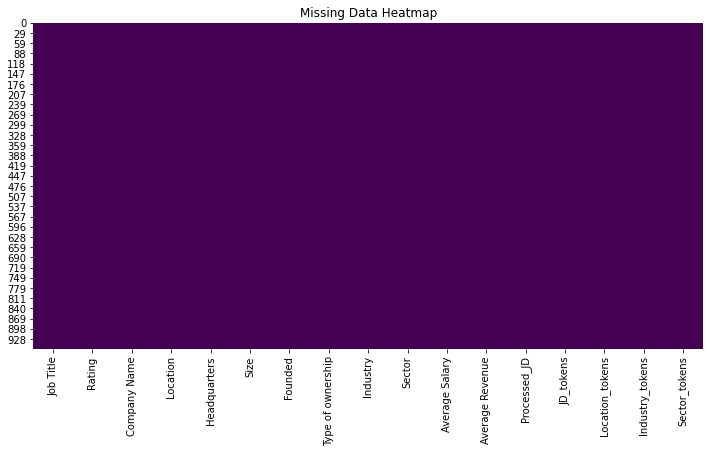

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


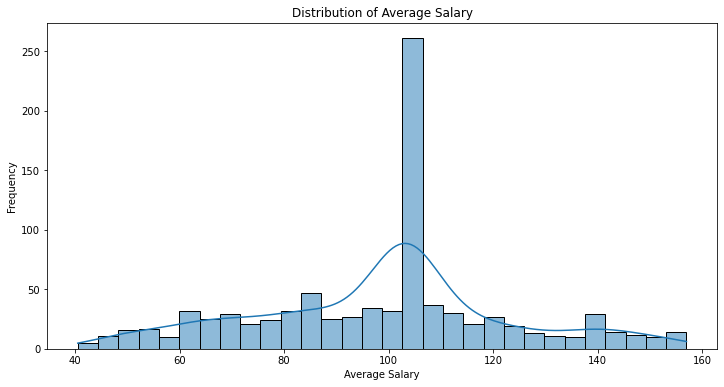

In [190]:
# Plotting the distribution of Estimated_Salary
plt.figure(figsize=(12, 6))
sns.histplot(df['Average Salary'], kde=True, bins=30)
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

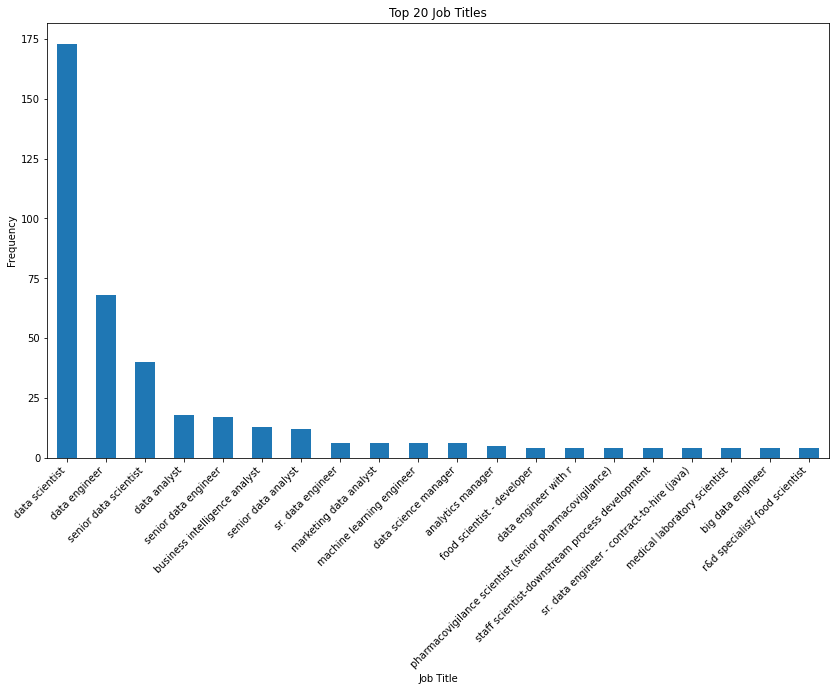

In [191]:
# Plotting the distribution of job titles
plt.figure(figsize=(14, 8))
df['Job Title'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


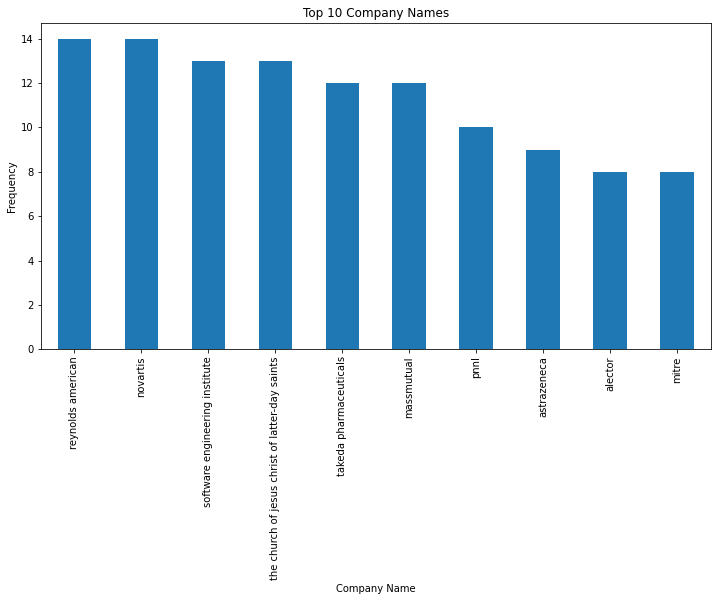

In [192]:
# Top 10 Company Names
plt.figure(figsize=(12, 6))
df['Company Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Company Names')
plt.xlabel('Company Name')
plt.ylabel('Frequency')
plt.show()


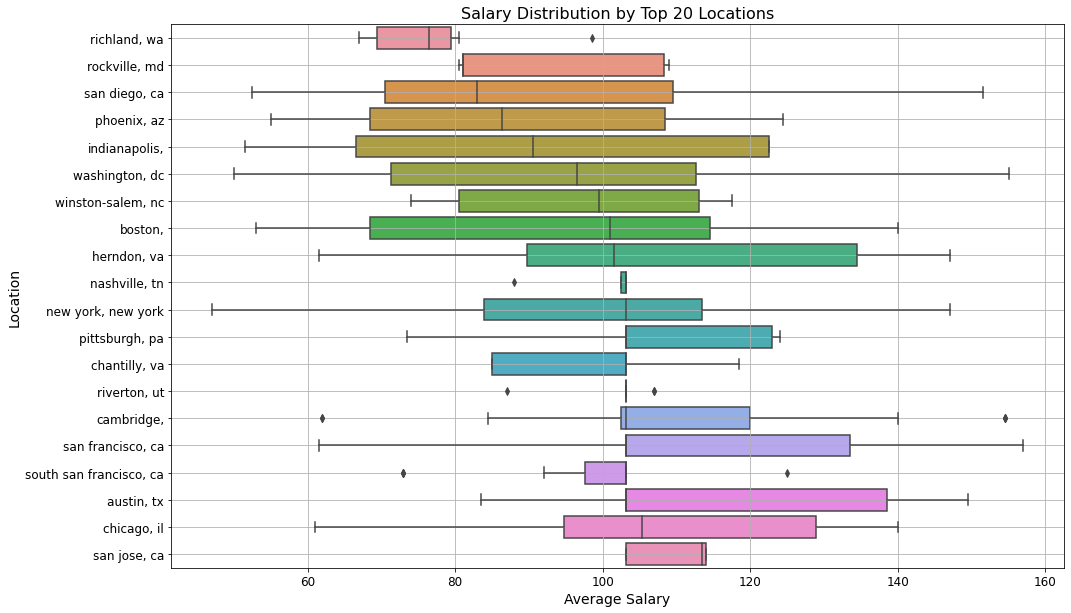

In [193]:
# Step 1: Filter top N locations by job count
top_locations = df['Location'].value_counts().head(20).index
filtered_df = df[df['Location'].isin(top_locations)]

# Step 2: Increase plot size and sort locations by median salary
plt.figure(figsize=(16, 10))
sns.boxplot(y='Location', x='Average Salary', data=filtered_df, order=filtered_df.groupby('Location')['Average Salary'].median().sort_values().index)
plt.title('Salary Distribution by Top 20 Locations', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


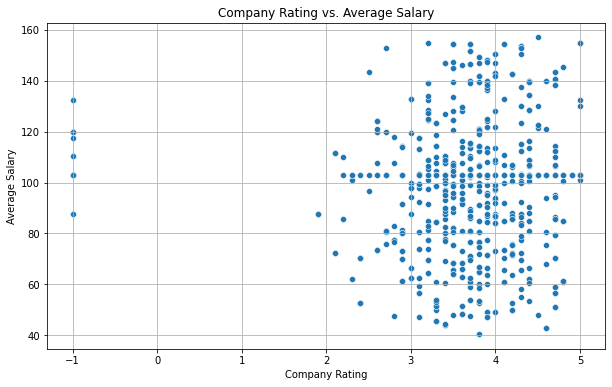

In [194]:
import numpy as np

# Convert 'Not Rated' to NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with NaN values in 'Company_Rating'
df_filtered = df.dropna(subset=['Rating'])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Average Salary', data=df_filtered)
plt.title('Company Rating vs. Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()


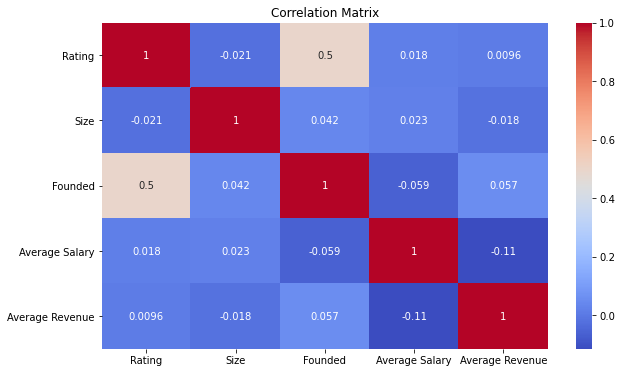

In [195]:
# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now, calculate the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [196]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming the dataframe is named df
# Example of columns to encode
categorical_columns = ['Job Title', 'Industry','Sector','Company Name','Processed_JD','Type of ownership', 'Size']  # Add other columns if needed

# Label Encoding
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# If you want to do one-hot encoding instead
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# For further modeling, you can now use df_encoded

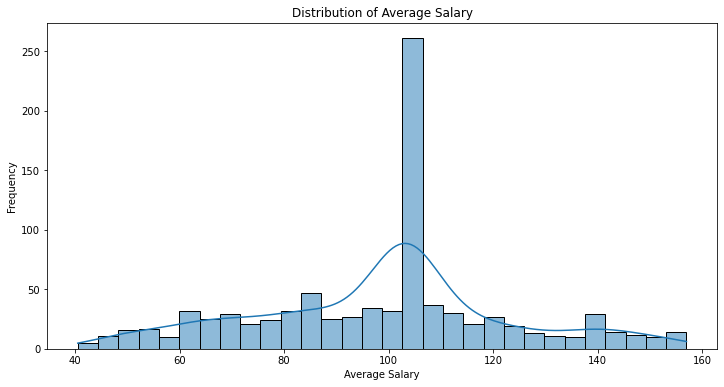

In [197]:
# Plotting the distribution of Average Salary

plt.figure(figsize=(12, 6))
sns.histplot(df_encoded['Average Salary'], kde=True, bins=30)
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()


In [198]:
# Define the Reader and load the data
reader = Reader(rating_scale=(0, 5))

df = Dataset.load_from_df(df[['Size', 'Average Salary', 'Rating']], reader)

In [199]:
from surprise import accuracy

# perform a train test split
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)


# Instantiate and fit the model
model_1 = KNNBasic(random_state = 42)
model_1.fit(trainset)

# Evaluate the model
prediction_1 = model_1.test(testset)

# Compute accuracy metrics
rmse_1 = accuracy.rmse(prediction_1)
mae_1 = accuracy.mae(prediction_1)

# Calculate percentage accuracy
rating_scale= 6
percentage_accuracy = 100 * (1 - (rmse_1 / rating_scale))

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse_1:.4f}")
print(f"Mean Absolute Error (MAE): {mae_1:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9447
MAE:  0.5704
Root Mean Squared Error (RMSE): 0.9447
Mean Absolute Error (MAE): 0.5704
Percentage Accuracy: 84.26%


KNN basic cross validation

In [200]:
# Define KNNBasic model
knn_model = KNNBasic()

# Perform cross-validation
cv_results_knn = cross_validate(knn_model, df, measures=['rmse', 'mae'], cv=5, verbose=True)

# Extract results
mean_rmse_knn = cv_results_knn['test_rmse'].mean()
mean_mae_knn = cv_results_knn['test_mae'].mean()

# Calculate percentage accuracy
rating_scale = 6
percentage_accuracy_knn = 100 * (1 - (mean_rmse_knn / rating_scale))

# Print the results
print(f"KNNBasic Model")
print(f"Root Mean Squared Error (RMSE): {mean_rmse_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mean_mae_knn:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy_knn:.2f}%")


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8752  0.7372  0.8499  0.8115  0.9447  0.8437  0.0687  
MAE (testset)     0.4995  0.4634  0.5226  0.5061  0.5704  0.5124  0.0348  
Fit time          0.01    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.01    0.02    0.03    0.03    0.02    0.02    0.01    
KNNBasic Model
Root Mean Squared Error (RMSE): 0.8437
Mean Absolute Error (MAE): 0.5124
Percentage Accuracy: 85.94%


In [201]:
# define the model
model_2 = SVD(random_state=42)
model_2.fit(trainset)

# Evaluate the model
prediction_2 = model_2.test(testset)

# Compute accuracy metrics
rmse_2 = accuracy.rmse(prediction_2)
mae_2 = accuracy.mae(prediction_2)

# Calculate percentage accuracy
rating_scale = 6
percentage_accuracy = 100 * (1 - (rmse_2 / rating_scale))

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse_2:.4f}")
print(f"Mean Absolute Error (MAE): {mae_2:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")


RMSE: 0.8293
MAE:  0.5067
Root Mean Squared Error (RMSE): 0.8293
Mean Absolute Error (MAE): 0.5067
Percentage Accuracy: 86.18%


cross validation svd

In [202]:
# Define SVD model
svd_model = SVD()

# Perform cross-validation
cv_results_svd = cross_validate(svd_model, df, measures=['rmse', 'mae'], cv=5, verbose=True)

# Extract results
mean_rmse_svd = cv_results_svd['test_rmse'].mean()
mean_mae_svd = cv_results_svd['test_mae'].mean()

# Calculate percentage accuracy
rating_scale = 6
percentage_accuracy_svd = 100 * (1 - (mean_rmse_svd / rating_scale))

# Print the results
print(f"SVD Model")
print(f"Root Mean Squared Error (RMSE): {mean_rmse_svd:.4f}")
print(f"Mean Absolute Error (MAE): {mean_mae_svd:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy_svd:.2f}%")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8362  0.9294  0.7996  0.7421  0.6980  0.8010  0.0798  
MAE (testset)     0.5310  0.5642  0.5081  0.4613  0.4532  0.5036  0.0419  
Fit time          0.12    0.06    0.05    0.06    0.05    0.07    0.02    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
SVD Model
Root Mean Squared Error (RMSE): 0.8010
Mean Absolute Error (MAE): 0.5036
Percentage Accuracy: 86.65%


In [203]:
# Perform Grid Search for SVD hyperparameters
param_grid = {
    'n_factors': [50, 100, 150],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.4],
    'n_epochs': [20, 30, 40]
}
g_s_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
g_s_svd.fit(df)

print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.7755841087519907, 'mae': 0.4499430007691737}
{'rmse': {'n_factors': 100, 'lr_all': 0.01, 'reg_all': 0.02, 'n_epochs': 40}, 'mae': {'n_factors': 150, 'lr_all': 0.01, 'reg_all': 0.02, 'n_epochs': 40}}


In [204]:
# define the model
model_2 = SVD(random_state=42)
model_2.fit(trainset)

# Evaluate the model
prediction_2 = model_2.test(testset)

# Compute accuracy metrics
rmse_2 = accuracy.rmse(prediction_2)
mae_2 = accuracy.mae(prediction_2)

# Calculate percentage accuracy
rating_scale = 6
percentage_accuracy = 100 * (1 - (rmse_2 / rating_scale))

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse_2:.4f}")
print(f"Mean Absolute Error (MAE): {mae_2:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

RMSE: 0.8293
MAE:  0.5067
Root Mean Squared Error (RMSE): 0.8293
Mean Absolute Error (MAE): 0.5067
Percentage Accuracy: 86.18%


In [205]:
# Perform Grid Search for SVD hyperparameters
param_grid = {
    'n_factors': [50, 100, 150],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.4],
    'n_epochs': [20, 30, 40]
}
g_s_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
g_s_svd.fit(df)

print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.7878846678744285, 'mae': 0.45622592287524827}
{'rmse': {'n_factors': 150, 'lr_all': 0.01, 'reg_all': 0.02, 'n_epochs': 30}, 'mae': {'n_factors': 150, 'lr_all': 0.01, 'reg_all': 0.02, 'n_epochs': 40}}


In [206]:
# Train model using the best parameters

best_model = g_s_svd.best_estimator['rmse']
best_params = g_s_svd.best_params
best_model.fit(trainset)

# Apply Cross-Validation
cv_results = cross_validate(best_model, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Implement Regularization in SVD
model_with_regularization = SVD(n_factors=100, lr_all=0.002, reg_all=0.4, n_epochs=30)
model_with_regularization.fit(trainset)

# Evaluate the model
predictions_3 = model_with_regularization.test(testset)
rmse_3 = accuracy.rmse(predictions_3)
mae_3 = accuracy.mae(predictions_3)

# Calculate percentage accuracy
rating_scale = 6
percentage_accuracy = 100 * (1 - (rmse_3 / rating_scale))

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse_3:.4f}")
print(f"Mean Absolute Error (MAE): {mae_3:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6861  0.8067  0.7923  0.7594  0.7639  0.7617  0.0417  
MAE (testset)     0.4279  0.4456  0.4604  0.4283  0.4775  0.4479  0.0191  
Fit time          0.11    0.10    0.10    0.09    0.09    0.10    0.01    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
RMSE: 0.8704
MAE:  0.5410
Root Mean Squared Error (RMSE): 0.8704
Mean Absolute Error (MAE): 0.5410
Percentage Accuracy: 85.49%


In [207]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV, train_test_split, cross_validate


# Split the data into training and test sets
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_factors': [50, 100, 150],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.4],
    'n_epochs': [20, 30, 40]
}

# Perform grid search for SVD hyperparameters
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
grid_search.fit(df)

# Print the best score and parameters
print("Best RMSE score: ", grid_search.best_score['rmse'])
print("Best parameters: ", grid_search.best_params['rmse'])

# Retrieve the best model with optimal parameters
best_svd_model = grid_search.best_estimator['rmse']

# Train the best model on the training set
best_svd_model.fit(trainset)

# Apply cross-validation on the best model
cv_results = cross_validate(best_svd_model, df, measures=['rmse', 'mae'], cv=5, verbose=True)

# Train a model with specific regularization parameters
regularized_model = SVD(n_factors=100, lr_all=0.002, reg_all=0.4, n_epochs=30)
regularized_model.fit(trainset)

# Evaluate the regularized model
predictions = regularized_model.test(testset)
rmse_value = accuracy.rmse(predictions)
mae_value = accuracy.mae(predictions)

# Calculate percentage accuracy
rating_scale = 6
percentage_accuracy = 100 * (1 - (rmse_value / rating_scale))

# Print the evaluation results
print(f"Root Mean Squared Error (RMSE): {rmse_value:.4f}")
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")


Best RMSE score:  0.7932738095700752
Best parameters:  {'n_factors': 150, 'lr_all': 0.01, 'reg_all': 0.1, 'n_epochs': 40}
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6907  0.7993  0.7522  0.9137  0.7562  0.7824  0.0742  
MAE (testset)     0.4453  0.5005  0.4757  0.5548  0.4770  0.4906  0.0365  
Fit time          0.14    0.14    0.14    0.14    0.13    0.14    0.01    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
RMSE: 0.8783
MAE:  0.5431
Root Mean Squared Error (RMSE): 0.8783
Mean Absolute Error (MAE): 0.5431
Percentage Accuracy: 85.36%


## Recomender System


In [208]:
# import numpy as np

# # Preprocessing salaries to standardize the format (e.g., converting ranges to average values)
# def preprocess_salary(salary):
#     if isinstance(salary, str):  # Check if the value is a string
#         salary = salary.replace('K', '').replace('$', '')
#         if '-' in salary:  # Handle salary ranges like "$50K - $60K"
#             lower, upper = salary.split('-')
#             return (int(lower.strip()) + int(upper.strip())) / 2
#         else:
#             return int(salary.strip())
#     elif np.isnan(salary):  # Handle missing (NaN) values
#         return np.nan  # Or you can fill it with a default value
#     else:  # If the salary is already a number, just return it
#         return salary

# # Apply the preprocessing function to the 'Average Salary' column
# df_encoded['processed_salary'] = df_encoded['Average Salary'].apply(preprocess_salary)


In [209]:
print(df_encoded.columns)


Index(['Rating', 'Location', 'Headquarters', 'Founded', 'Average Salary',
       'Average Revenue', 'JD_tokens', 'Location_tokens', 'Industry_tokens',
       'Sector_tokens',
       ...
       'Type of ownership_12', 'Size_0', 'Size_1', 'Size_2', 'Size_3',
       'Size_4', 'Size_5', 'Size_6', 'Size_7', 'Size_8'],
      dtype='object', length=1408)


In [210]:
df_encoded.head

<bound method NDFrame.head of      Rating            Location       Headquarters  Founded  Average Salary  \
0       3.8     albuquerque, nm         goleta, ca     1973         72.0000   
1       3.4       linthicum, md      baltimore, md     1984         87.5000   
2       4.8      clearwater, fl     clearwater, fl     2010         85.0000   
3       3.8        richland, wa       richland, wa     1965         76.5000   
4       2.9  new york, new york       new york, ny     1998        114.5000   
..      ...                 ...                ...      ...             ...   
951     4.4       nashville, tn  san francisco, ca     2006        102.5000   
952     2.6      pittsburgh, pa     pittsburgh, pa     1984         73.5000   
953     3.2       allentown, pa    chadds ford, pa       -1        127.5000   
954     4.8          austin, tx       portland, or     2015        103.1539   
955     3.6     beavercreek, oh      arlington, va     1967         93.5000   

     Average Revenue 

In [211]:
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np
# import joblib

# # Load the pre-trained models
# tfidf = joblib.load('tfidf_job_model.pkl')
# svd_model = joblib.load('svd_job_model.pkl')
# job_lsa = joblib.load('job_lsa.pkl')

# def get_job_recommendations(input_salary):
#     # Standardize the input salary
#     processed_input_salary = preprocess_salary(input_salary)
    
#     # Define a salary range (e.g., 10% tolerance)
#     salary_range = 0.1 * processed_input_salary
#     similar_jobs = df_encoded[(df_encoded['processed_salary'] >= (processed_input_salary - salary_range)) & 
#                               (df_encoded['processed_salary'] <= (processed_input_salary + salary_range))]
    
#     if similar_jobs.empty:
#         return "No jobs found within the given salary range."
    
#     # Get the positions of the corresponding LSA vectors for these jobs
#     similar_jobs_index = similar_jobs.index
    
#     # Use iloc to get the rows from job_lsa based on the position in the DataFrame
#     similar_jobs_lsa = job_lsa[similar_jobs_index.to_list()]

#     # Calculate cosine similarity between job LSA vectors and the user's salary preference
#     cosine_sim = cosine_similarity(similar_jobs_lsa, similar_jobs_lsa)
    
#     # Assign similarity scores to the jobs
#     similar_jobs['similarity_score'] = cosine_sim.mean(axis=1)
    
#     # Sort the jobs by similarity score
#     recommendations = similar_jobs.sort_values(by='similarity_score', ascending=False)
    
#     return recommendations

# # Example usage
# input_salary = input("Enter your desired salary (e.g., $55K): ").strip() # Replace with user input
# recommendations = get_job_recommendations(input_salary)

# # Display top 5 job recommendations
# if isinstance(recommendations, str):
#     print(recommendations)
# else:
#     print(recommendations[['Job Title', 'Company Name', 'Average Salary', 'similarity_score']].head(5))


In [212]:
# def interactive_job_recommender():
#     print("Welcome to the Job Recommender System!")
#     print("Enter the salary you're looking for (e.g., '$55K').")
#     print("Type 'quit' to exit the program.")
    
#     while True:
#         user_input = input("\nEnter your desired salary: ").strip()
#         if user_input.lower() == 'quit':
#             print("Thank you for using the Job Recommender System. Goodbye!")
#             break

#         if not user_input:
#             print("Please enter a valid salary.")
#             continue
        
#         try:
#             recommendations = get_job_recommendations(user_input)
#             if isinstance(recommendations, str):
#                 print(recommendations)
#                 continue
            
#             print("\nTop 5 Recommended Jobs:")
#             for i, (_, row) in enumerate(recommendations.head(5).iterrows(), 1):
#                 print(f"\n{i}. {row['Job Title']} at {row['Company Name']} (Salary: {row['Average Salary']}, Similarity: {row['similarity_score']:.2f})")
        
#         except Exception as e:
#             print(f"An error occurred: {str(e)}")
#             print("Please try again with a different salary input.")

# # To run the function, simply call:
# interactive_job_recommender()


In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import joblib

# Step 1: Convert token lists to strings
df_encoded['JD_tokens_str'] = df_encoded['JD_tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Step 2: Preprocess and Vectorize Job Titles/Descriptions
# Using 'JD_tokens_str' as the text column for TF-IDF vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_encoded['JD_tokens_str'])

# (Optional) Apply Truncated SVD for dimensionality reduction
svd_model = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
job_title_lsa = svd_model.fit_transform(tfidf_matrix)

# Save the models
joblib.dump(tfidf, 'tfidf_job_title_model.pkl')
joblib.dump(svd_model, 'svd_job_title_model.pkl')
joblib.dump(job_title_lsa, 'job_title_lsa.pkl')

# Step 3: Recommender Function Based on Job Descriptions (as a proxy for Job Titles)
def get_job_title_recommendations(input_job_title):
    # Transform the input job title/description using the pre-trained TF-IDF model
    input_tfidf = tfidf.transform([input_job_title])
    
    # (Optional) Transform using the pre-trained SVD model
    input_lsa = svd_model.transform(input_tfidf)
    
    # Calculate cosine similarity between the input job title/description and all other job titles/descriptions
    cosine_sim = cosine_similarity(input_lsa, job_title_lsa).flatten()
    
    # Add similarity scores to the DataFrame
    df_encoded['similarity_score'] = cosine_sim
    
    # Sort the jobs by similarity score
    recommendations = df_encoded.sort_values(by='similarity_score', ascending=False)
    
    return recommendations

# Step 4: Interactive System or Example Usage
input_job_title = input("Enter the job title or description you're interested in (e.g., 'Data Scientist'): ").strip()

recommendations = get_job_title_recommendations(input_job_title)

# Display top 5 job recommendations with available columns
if recommendations.empty:
    print("No job titles found.")
else:
    # Adjust column names based on availability
    print(recommendations[['JD_tokens_str', 'Location', 'Average Salary', 'Industry_tokens', 'similarity_score']].head(5))


                                         JD_tokens_str             Location  \
587  hi , greetings day ! ! ! looking data scientis...   new york, new york   
377  data operations lead location : flexible thoug...    san francisco, ca   
97   location : huntsville , clearance : secret cle...       huntsville, al   
476  overview : blazing new trail , developing insi...  fort lauderdale, fl   
54   overview : blazing new trail , developing insi...  fort lauderdale, fl   

     Average Salary              Industry_tokens  similarity_score  
587           145.5                   [services]          0.719592  
377            87.5                         [-1]          0.712352  
97             48.0                   [services]          0.710591  
476            91.0  [advertising, &, marketing]          0.705520  
54             91.0  [advertising, &, marketing]          0.705520  
